# Read Zarr File

In [12]:
import os
import xarray as xr
import pandas as pd
import hvplot.xarray
from dask.distributed import Client
import numpy as np
import xrft

storage_options = {'account_name':'lfhydrophone', 'account_key':os.environ['AZURE_KEY']}
zarr_dir = 'abfs://hydrophonedata/lf_hydrophone_data_test.zarr'

In [2]:
client = Client()

In [3]:
client

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://127.0.0.1:8787/status,
Dashboard: http://127.0.0.1:8787/status,Workers: 8
Total threads: 32,Total memory: 62.80 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:36543,Workers: 8
Dashboard: http://127.0.0.1:8787/status,Total threads: 32
Started: Just now,Total memory: 62.80 GiB
Comm: tcp://127.0.0.1:41647,Total threads: 4
Dashboard: http://127.0.0.1:46347/status,Memory: 7.85 GiB
Nanny: tcp://127.0.0.1:38327,


In [4]:
ds = xr.open_zarr(zarr_dir, storage_options=storage_options)

In [5]:
base_time = pd.Timestamp('2015-01-01')

start_time = pd.Timestamp('2019-07-15')
end_time = pd.Timestamp('2019-08-15')

start_idx = int((start_time.value - base_time.value)*1e-9*200)
end_idx = int((end_time.value - base_time.value)*1e-9*200)

#time_coord = pd.to_datetime(pd.Series(np.arange(start_time.value, end_time.value, 1e9/200)))

In [6]:
ds_slice = ds.isel({'time':slice(start_idx, end_idx)})

## Play around with building PSD

In [88]:
ax_roll = 20*np.log10(xrft.fft(ds_slice.AXCC1.rolling({'time':512}).construct('time_roll', stride=256), dim='time_roll').median('time'))

In [90]:
ax_psd = ax_roll.compute()

/home/jhrag/anaconda3/envs/ooi_dev/lib/python3.10/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in multiply
  return func(*(_execute_task(a, cache) for a in args))


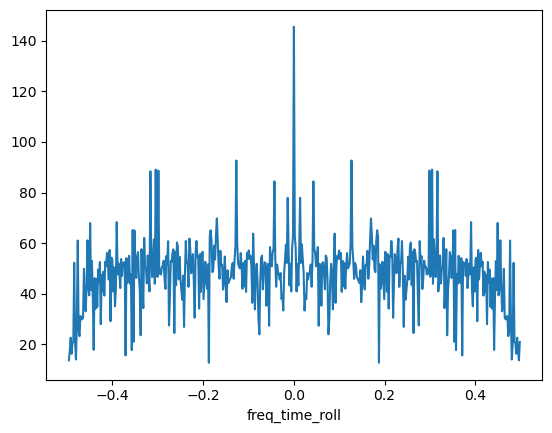

In [94]:
np.abs(ax_psd[2:]).plot()

## Play around with building a spectrogram

In [58]:
ax_roll1 = ds_slice.AXCC1.rolling({'time':24*200*3600}).construct('time_roll', stride=24*200*3600)

In [61]:
ax_roll2 = ax_roll1.rolling({'time_roll':15*60*200}).construct('short_time', stride=15*60*200)

In [66]:
ax_f = 20*np.log10(np.abs(xrft.fft(ax_roll2 - ax_roll2.mean('short_time'), dim='short_time'))).median('time_roll')

In [68]:
ax_f = ax_f.compute()

/home/jhrag/anaconda3/envs/ooi_dev/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1217: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,
/home/jhrag/anaconda3/envs/ooi_dev/lib/python3.10/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in log10
  return func(*(_execute_task(a, cache) for a in args))
/home/jhrag/anaconda3/envs/ooi_dev/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1217: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,
/home/jhrag/anaconda3/envs/ooi_dev/lib/python3.10/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in log10
  return func(*(_execute_task(a, cache) for a in args))
/home/jhrag/anaconda3/envs/ooi_dev/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1217: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis,

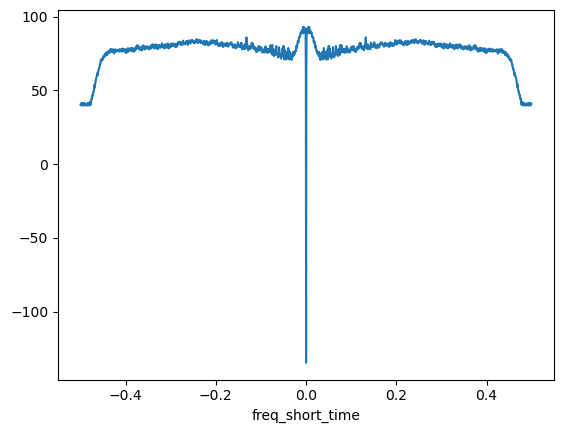

In [72]:
ax_f[10,::100].plot()

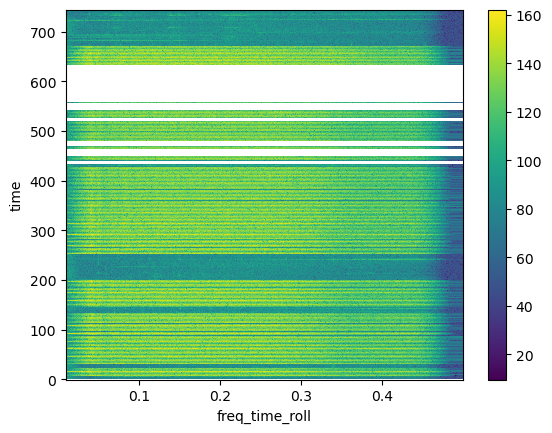

In [39]:
xf[:,::500].loc[:,0.01:5].plot()

2022-10-27 18:27:01,416 - distributed.nanny - ERROR - Worker process died unexpectedly
2022-10-27 18:27:01,416 - distributed.nanny - ERROR - Worker process died unexpectedly
2022-10-27 18:27:01,416 - distributed.nanny - ERROR - Worker process died unexpectedly
2022-10-27 18:27:01,417 - distributed.nanny - ERROR - Worker process died unexpectedly
2022-10-27 18:27:01,417 - distributed.nanny - ERROR - Worker process died unexpectedly
2022-10-27 18:27:01,417 - distributed.nanny - ERROR - Worker process died unexpectedly
2022-10-27 18:27:03,022 - distributed.nanny - WARNING - Restarting worker
2022-10-27 18:27:03,428 - distributed.nanny - WARNING - Restarting worker
2022-10-27 18:27:03,477 - distributed.nanny - WARNING - Restarting worker
2022-10-27 18:27:03,578 - distributed.nanny - WARNING - Restarting worker
2022-10-27 18:27:03,690 - distributed.nanny - WARNING - Restarting worker
2022-10-27 18:27:03,792 - distributed.nanny - WARNING - Restarting worker
2022-10-27 18:27:03,951 - distribu

KeyboardInterrupt: 

2022-10-27 18:27:03,966 - distributed.nanny - WARNING - Restarting worker


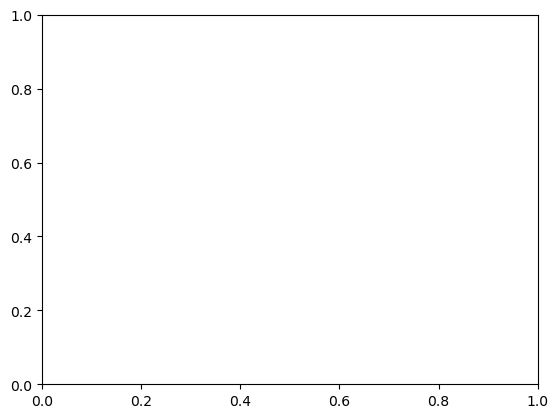

In [19]:
xf.plot(x='time', y='freq_time_roll')